In [20]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
#want results in notebook 
%matplotlib inline

In [21]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
test = pd.read_csv("test.csv")
test.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Sex: If individ. survived, 2x more likely to be female

In [23]:
# P(F and S)
f_surv = sum((train["Sex"] == "female") & (train["Survived"] == 1))
f_surv / (len(train))

0.26150392817059481

In [24]:
# P(M and S)
m_surv = sum((train["Sex"] == "male") & (train["Survived"] == 1))
m_surv/ (len(train))

0.122334455667789

In [25]:
# P(F|S)= (P(F and S)) / P(S)
surv = sum(train["Survived"] == 1)
prob_f_surv = f_surv/surv
prob_f_surv

0.68128654970760238

In [26]:
# P(M|S)= (P(M and S)) / P(S)
prob_m_surv = m_surv/surv
prob_m_surv

0.31871345029239767

# General Conditional Probability - indep events

In [27]:
def conditionalprob(df, i1, v1, i2, v2):
    """P(i1 == v1 given i2 ==v2) = P(i1==v1 & i2==v2)/P(i2==v2)"""
    num = sum((df[i1] == v1) & (df[i2] == v2)) / len(df)
    denom = sum(df[i2] == v2) / len(df)
    return (num/denom)

In [28]:
#Testing: same conditional probability as previous section
conditionalprob(train, "Sex", "female", "Survived", 0)

0.14754098360655737

In [29]:
(train[train.Survived == 0].Sex == "male").sum() / sum(train.Survived == 0)

0.85245901639344257

In [30]:
def probability(df, i, v):
    """P(i == v)"""
    return sum(df[i] == v) / len(df)

In [31]:
#checking
probability(train, "Sex", "male") + probability(train, "Sex", "female")

1.0

# Does age play a role?
#### Age: If individ. survived, 80% likely to be an adult

In [32]:
#Compare the normalized survival rates for those who are <18 and those who are older.

In [33]:
# original mistake: chained indexing returns a copy of the dataframe and not an actual view
# train[train["Age"]<18]["Child"] = 1 
# train[train["Age"]>=18]["Child"] = 0

In [34]:
# Add a "Child" column to train
train["Child"] = (train["Age"] <= 18)
train["Child"].astype("int")

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      1
10     1
11     0
12     0
13     0
14     1
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     1
25     0
26     0
27     0
28     0
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    1
870    0
871    0
872    0
873    0
874    0
875    1
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    0
888    0
889    0
890    0
Name: Child, dtype: int32

In [35]:
probability(train, "Survived", 1) + probability(train, "Child", 1)

0.53984287317620649

In [36]:
#(probability(train,"Survived", 1) or probability(train,"Child", 1))
#includes 1 and 0

In [53]:
#Index train["Survived] with the Child series
#if passenger is a child, probability survived?

print(train["Survived"][train["Child"] == 1].value_counts(normalize=True))
print(train["Survived"][train["Pclass"] == 1].value_counts(normalize=True))

1    0.503597
0    0.496403
Name: Survived, dtype: float64
1    0.62963
0    0.37037
Name: Survived, dtype: float64


# Two-way relative frequency table: Sex and Survival 

In [39]:
for gender in train.Sex.unique():
    print("{:7}".format(gender), end = " ")
    for survived in train.Survived.unique():
        prob1 = conditionalprob(train, "Sex", gender, "Survived", survived)
        print("{:5.3f}".format(prob1), end = " ")
    prob2 = probability(train, "Sex", gender)
    print("{:5.3f}".format(prob2))

male    0.852 0.319 0.648
female  0.148 0.681 0.352


# Matrix Operations

In [40]:
Ѫ = np.random.randint(0,10,(4,5))

In [41]:
def sum2d(array):
    """Find the sum of all elements in a 2-D array manually"""
    total_sum = 0
    for row in array:
        for column in row:
            total_sum += column
    return total_sum

In [42]:
def sum2d_index(array):
    """Find the sum of all elements in a 2-D array manually. The outer loop iterates over columns, which is much slower than rows."""
    total = 0
    for j in range(array.shape[1]):
        for i in range(array.shape[0]):
            total += array[i, j]
    return total

In [43]:
#Iterating with rows first is much more efficient. The sum function is most efficient.
a = np.random.rand(1000,1000)
%timeit sum2d(a)
%timeit sum2d_index(a)
%timeit a.sum()

1 loop, best of 3: 659 ms per loop
1 loop, best of 3: 1.18 s per loop
100 loops, best of 3: 2.64 ms per loop


# Descriptives and Simple Visualization

Pclass
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
Name: Fare, dtype: object

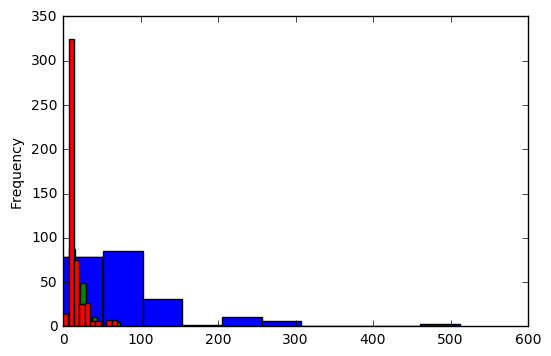

In [61]:
train.groupby("Pclass")["Fare"].plot(kind="hist")

In [46]:
#Find avg fare each class spent. 
print(train[train["Pclass"] == 1]["Fare"].median())
print(train[train["Pclass"] == 2]["Fare"].median())
print(train[train["Pclass"] == 3]["Fare"].median())

60.287499999999994
14.25
8.05


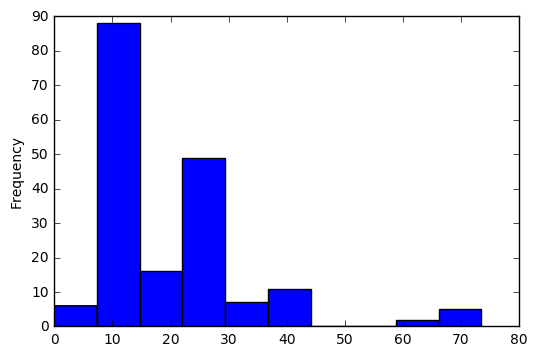

In [59]:
train[train["Pclass"] == 2]["Fare"].plot(kind = "hist")